Import Libraries

In [531]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score


In [532]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the dataset

In [533]:
train_path = "./Datasets/train.csv"
test_path = "./Datasets/test.csv"

mall_train_path = "./Datasets/mall_train.csv"
mall_test_path = "./Datasets/mall_test.csv"
mrt_train_path = "./Datasets/mrt_train.csv"
mrt_test_path = "./Datasets/mrt_test.csv"
school_train_path = "./Datasets/school_train.csv"
school_test_path = "./Datasets/school_test.csv"
stock_train_path = "./Datasets/stock_train.csv"
stock_test_path = "./Datasets/stock_test.csv"
coe_train_path = "./Datasets/coe_train.csv"
coe_test_path = "./Datasets/coe_test.csv"

school_ranking_path = "./Datasets/schools_ranking.csv"


train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

mall_test = pd.read_csv(mall_test_path)
mall_train = pd.read_csv(mall_train_path)
mrt_train = pd.read_csv(mrt_train_path)
mrt_test = pd.read_csv(mrt_test_path)
school_train = pd.read_csv(school_train_path)
school_test = pd.read_csv(school_test_path)
stock_train = pd.read_csv(stock_train_path)
stock_test = pd.read_csv(stock_test_path)
coe_train = pd.read_csv(coe_train_path)
coe_test = pd.read_csv(coe_test_path)

school_ranking = pd.read_csv(school_ranking_path)


In [534]:
mrt_columns = ['MRT_1km', 'nearest_MRT_dis', 'mrt_average_price']
train_data[mrt_columns] = mrt_train[mrt_columns]
test_data[mrt_columns] = mrt_test[mrt_columns]

school_columns = ['nearest_school_dis', 'nearest_school_name']
train_data[school_columns] = school_train[school_columns]
test_data[school_columns] = school_test[school_columns]

mall_columns = ['nearest_mall_dis', 'nearest_mall_name']
train_data[mall_columns] = mall_train[mall_columns]
test_data[mall_columns] = mall_test[mall_columns]

stock_columns = ['stock_price']
train_data[stock_columns] = stock_train[stock_columns]
test_data[stock_columns] = stock_test[stock_columns]

coe_columns = ['coe']
train_data[coe_columns] = coe_train[coe_columns]
test_data[coe_columns] = coe_test[coe_columns]

See train data distribution

In [535]:
train_data.shape

(60000, 25)

In [536]:
train_data.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,monthly_rent,MRT_1km,nearest_MRT_dis,mrt_average_price,nearest_school_dis,nearest_school_name,nearest_mall_dis,nearest_mall_name,stock_price,coe
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,1600,1.0,0.200699,2481.346424,0.334495,Yuhua Primary School,1.197252,Westgate,16.261529,54951.625
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,...,2250,1.0,0.000923,2425.980392,0.605547,St. Anthony's Canossian Primary School,1.114364,Djitsun Mall Bedok,11.028718,77035.625
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,...,1900,4.0,0.518801,2632.947462,0.426187,CHIJ Primary (Toa Payoh),0.468813,HDB Hub,9.316933,89580.250
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,...,2850,0.0,-0.647366,2687.550471,0.562392,Pasir Ris Primary School,0.400741,Loyang Point,16.122748,51997.375
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,...,2100,3.0,0.487930,2589.985486,0.271506,Bendemeer Primary School,1.067395,Aperia,9.455489,99472.875


In [537]:
train_data.nunique()

rent_approval_date       31
town                     26
block                  2553
street_name            1083
flat_type                 9
flat_model               19
floor_area_sqm          146
furnished                 1
lease_commence_date      54
latitude               8612
longitude              8612
elevation                 1
subzone                 152
planning_area            29
region                    5
monthly_rent            113
MRT_1km                  15
nearest_MRT_dis        8630
mrt_average_price        96
nearest_school_dis     8612
nearest_school_name     164
nearest_mall_dis       8610
nearest_mall_name       114
stock_price              31
coe                      31
dtype: int64

In [538]:
train_data.isna().sum()

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
MRT_1km                0
nearest_MRT_dis        0
mrt_average_price      0
nearest_school_dis     0
nearest_school_name    0
nearest_mall_dis       0
nearest_mall_name      0
stock_price            0
coe                    0
dtype: int64

Data preprocessing of train_data

In [539]:
def data_preprocessing(data):
    data.replace("-", " ", regex=True, inplace=True)

    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].str.lower()
    
    data['lease_commence_date'] = 2021 - data['lease_commence_date']

    def convert_to_numeric(date_str):
        year, month = date_str.split(" ")
        return float(year) + float(month)/12.0
    data['rent_approval_date'] = [convert_to_numeric(date) for date in data['rent_approval_date']]

    data['rent_approval_date'] = data['rent_approval_date'] - 2021
    
    data.rename(columns={'nearest_school_name': 'School Name'}, inplace=True)
    school_ranking['School Name'] = school_ranking['School Name'].str.lower()
    data = data.merge(school_ranking[['School Name', 'Rank']], on='School Name', how='left')
    data['Rank'] = (data['Rank'] / 10).astype('int64')
    # data = data.drop_duplicates()
    # data = data.reset_index(drop=True)
    # data['monthly_rent'] = np.log1p(data['monthly_rent'])
    # data.drop(data[(data['floor_area_sqm']<30)].index, inplace=True)
    # data.drop(data[(data['floor_area_sqm']>160)].index, inplace=True)
    # data.drop(data[(data['monthly_rent']>6000)].index, inplace=True)
    # data.drop(data[(data['monthly_rent']<500)].index, inplace=True)
    
    return data

train_data = data_preprocessing(train_data)
train_data


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,MRT_1km,nearest_MRT_dis,mrt_average_price,nearest_school_dis,School Name,nearest_mall_dis,nearest_mall_name,stock_price,coe,Rank
0,0.750000,jurong east,257,jurong east street 24,3 room,new generation,67.0,yes,38,1.344518,...,1.0,0.200699,2481.346424,0.334495,yuhua primary school,1.197252,westgate,16.261529,54951.625,13
1,1.416667,bedok,119,bedok north road,4 room,new generation,92.0,yes,43,1.330186,...,1.0,0.000923,2425.980392,0.605547,st. anthony's canossian primary school,1.114364,djitsun mall bedok,11.028718,77035.625,8
2,1.833333,toa payoh,157,lorong 1 toa payoh,3 room,improved,67.0,yes,50,1.332242,...,4.0,0.518801,2632.947462,0.426187,chij primary (toa payoh),0.468813,hdb hub,9.316933,89580.250,4
3,0.666667,pasir ris,250,pasir ris street 21,executive,apartment,149.0,yes,28,1.370239,...,0.0,-0.647366,2687.550471,0.562392,pasir ris primary school,0.400741,loyang point,16.122748,51997.375,8
4,1.916667,kallang/whampoa,34,whampoa west,3 room,improved,68.0,yes,49,1.320502,...,3.0,0.487930,2589.985486,0.271506,bendemeer primary school,1.067395,aperia,9.455489,99472.875,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.750000,ang mo kio,441,ang mo kio avenue 10,3 room,new generation,67.0,yes,42,1.366050,...,1.0,0.231013,2461.518550,0.361006,ang mo kio primary school,0.947922,jubilee square,16.261529,54951.625,15
59996,2.333333,bukit merah,95a,henderson road,4 room,model a,83.0,yes,2,1.286493,...,2.0,0.279747,2881.436907,0.562558,zhangde primary school,0.741501,tiong bahru plaza,9.936699,104404.750,7
59997,1.500000,tampines,862a,tampines street 83,5 room,improved,122.0,yes,33,1.355064,...,2.0,0.176264,2643.672840,0.318659,poi ching school,0.439827,our tampines hub,10.236245,83323.125,1
59998,2.083333,bedok,67,bedok sth avenue 3,5 room,standard,123.0,yes,44,1.318974,...,1.0,-0.018778,2425.980392,0.219191,temasek primary school,1.775637,bedok mall,9.899588,92845.000,5


Feature Engineering of train_data

In [540]:
X_train_num = train_data.select_dtypes(include = ['float64', 'int64'])
print(X_train_num.shape)
X_train_num.head()

(60000, 15)


,rent_approval_date,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent,MRT_1km,nearest_MRT_dis,mrt_average_price,nearest_school_dis,nearest_mall_dis,stock_price,coe,Rank
0,0.750000,67.0,38,1.344518,103.738630,0.0,1600,1.0,0.200699,2481.346424,0.334495,1.197252,16.261529,54951.625,13
1,1.416667,92.0,43,1.330186,103.938717,0.0,2250,1.0,0.000923,2425.980392,0.605547,1.114364,11.028718,77035.625,8
2,1.833333,67.0,50,1.332242,103.845643,0.0,1900,4.0,0.518801,2632.947462,0.426187,0.468813,9.316933,89580.250,4
3,0.666667,149.0,28,1.370239,103.962894,0.0,2850,0.0,-0.647366,2687.550471,0.562392,0.400741,16.122748,51997.375,8
4,1.916667,68.0,49,1.320502,103.863341,0.0,2100,3.0,0.487930,2589.985486,0.271506,1.067395,9.455489,99472.875,10


In [541]:
X_train_cat = train_data.select_dtypes(include = ['object'])
print(X_train_cat.shape)
X_train_cat.head()

(60000, 11)


,town,block,street_name,flat_type,flat_model,furnished,subzone,planning_area,region,School Name,nearest_mall_name
0,jurong east,257,jurong east street 24,3 room,new generation,yes,yuhua east,jurong east,west region,yuhua primary school,westgate
1,bedok,119,bedok north road,4 room,new generation,yes,bedok north,bedok,east region,st. anthony's canossian primary school,djitsun mall bedok
2,toa payoh,157,lorong 1 toa payoh,3 room,improved,yes,toa payoh central,toa payoh,central region,chij primary (toa payoh),hdb hub
3,pasir ris,250,pasir ris street 21,executive,apartment,yes,pasir ris drive,pasir ris,east region,pasir ris primary school,loyang point
4,kallang/whampoa,34,whampoa west,3 room,improved,yes,bendemeer,kallang,central region,bendemeer primary school,aperia


array([[<AxesSubplot:title={'center':'rent_approval_date'}>,
        <AxesSubplot:title={'center':'floor_area_sqm'}>,
        <AxesSubplot:title={'center':'lease_commence_date'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'elevation'}>,
        <AxesSubplot:title={'center':'monthly_rent'}>,
        <AxesSubplot:title={'center':'MRT_1km'}>],
       [<AxesSubplot:title={'center':'nearest_MRT_dis'}>,
        <AxesSubplot:title={'center':'mrt_average_price'}>,
        <AxesSubplot:title={'center':'nearest_school_dis'}>,
        <AxesSubplot:title={'center':'nearest_mall_dis'}>],
       [<AxesSubplot:title={'center':'stock_price'}>,
        <AxesSubplot:title={'center':'coe'}>,
        <AxesSubplot:title={'center':'Rank'}>, <AxesSubplot:>]],
      dtype=object)

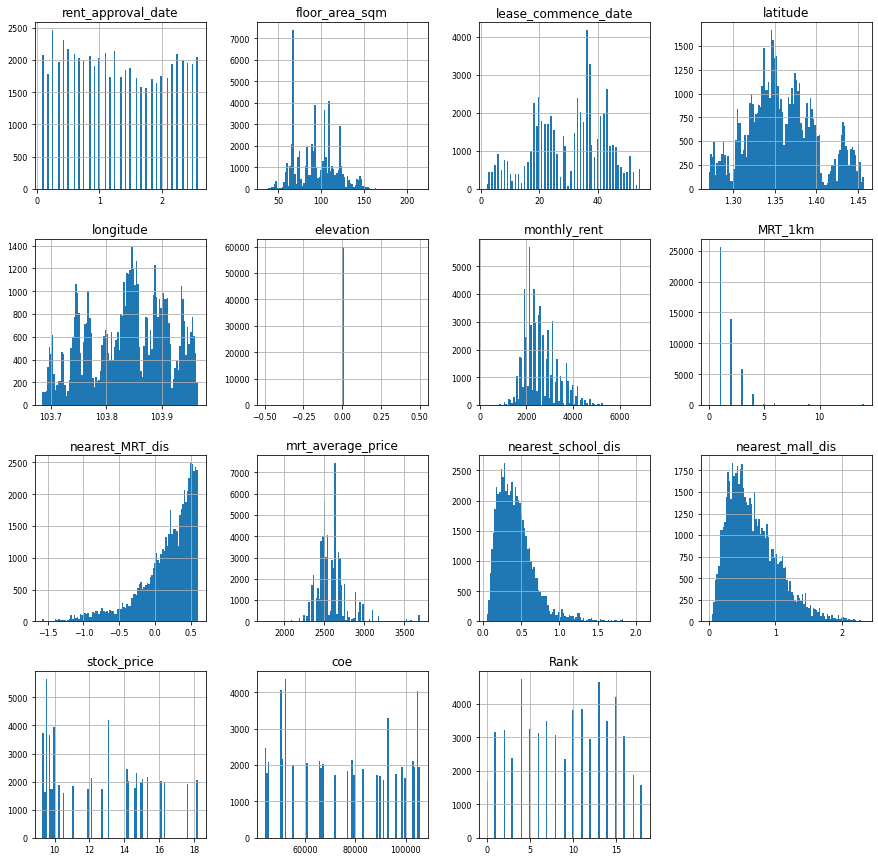

In [542]:
X_train_num.hist(figsize=(15, 15), bins=100, xlabelsize=8, ylabelsize=8)

<AxesSubplot:>

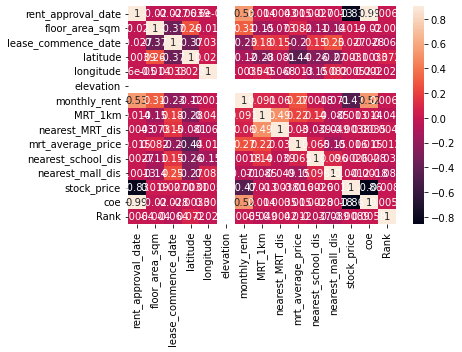

In [543]:
corrmat = X_train_num.corr()
sns.heatmap(corrmat, vmax=.9, annot=True)

count    60000.000000
mean      2590.328333
std        714.910468
min        300.000000
25%       2100.000000
50%       2400.000000
75%       3000.000000
max       6950.000000
Name: monthly_rent, dtype: float64


<Figure size 432x288 with 0 Axes>

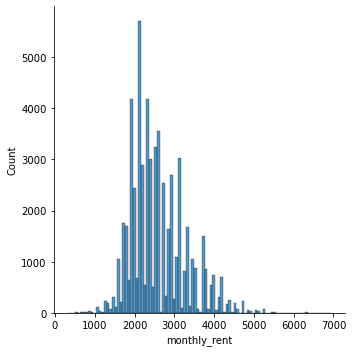

In [544]:
y_train = train_data['monthly_rent']
print(y_train.describe())
plt.figure()
sns.displot(y_train, bins=100)

In [545]:
def feature_engineering(data):
    # numerical feature
    data_num = data.select_dtypes(include = ['float64', 'int64'])
    data_num = data_num[['rent_approval_date', 'floor_area_sqm', 'lease_commence_date','mrt_average_price','MRT_1km', 'nearest_MRT_dis', 'nearest_school_dis', 'Rank']] #'coe', 'stock_price''close' 'nearest_mall_dis'
    # data_num['stock_price'] = -data_num['stock_price']
    # categorical feature
    data_cat = data.select_dtypes(include = ['object'])
    data_cat_one_hot = pd.get_dummies(data[['region']]) #'flat_type' , 'planning_area', 'town', 'flat_model' 'region',

    data_cat_target = pd.DataFrame()

    # region_encoded = train_data.groupby('region')['monthly_rent'].mean()
    # data_cat_target['region_encoded'] = data['region'].map(region_encoded)
    
    town_encoded = train_data.groupby('town')['monthly_rent'].mean()
    data_cat_target['town_encoded'] = data['town'].map(town_encoded)
    
    planning_area_encoded = train_data.groupby('planning_area')['monthly_rent'].mean()
    data_cat_target['planning_area_encoded'] = data['planning_area'].map(planning_area_encoded)

    subzone_encoded = train_data.groupby('subzone')['monthly_rent'].mean()
    data_cat_target['subzone_encoded'] = data['subzone'].map(subzone_encoded)

    flat_model_encoded = train_data.groupby('flat_model')['monthly_rent'].mean()
    data_cat_target['flat_model_encoded'] = data['flat_model'].map(flat_model_encoded)

    flat_type_encoded = train_data.groupby('flat_type')['monthly_rent'].mean()
    data_cat_target['flat_type_encoded'] = data['flat_type'].map(flat_type_encoded)

    # block_encoded = train_data.groupby('block')['monthly_rent'].median().transform(lambda x: int(x / 1000) * 1000)
    # data_cat_target['block_encoded'] = data['block'].map(block_encoded)

    street_name_encoded = train_data.groupby('street_name')['monthly_rent'].mean()
    data_cat_target['street_name_encoded'] = data['street_name'].map(street_name_encoded)

    # nearest_mall_name_encoded = train_data.groupby('nearest_mall_name')['monthly_rent'].mean()
    # data_cat_target['nearest_mall_name_encoded'] = data['nearest_mall_name'].map(nearest_mall_name_encoded)

    # nearest_school_name_encoded = train_data.groupby('nearest_school_name')['monthly_rent'].mean()
    # data_cat_target['nearest_school_name_encoded'] = data['nearest_school_name'].map(nearest_school_name_encoded)

    # data_cat_target['town_encoded'] = train_data.groupby('town')['monthly_rent'].transform('mean')
    # data_cat_target['planning_area_encoded'] = train_data.groupby('planning_area')['monthly_rent'].transform('mean')
    # data_cat_target['block_encoded'] = train_data.groupby('block')['monthly_rent'].transform('mean')
    # data_cat_target['street_name_encoded'] = train_data.groupby('street_name')['monthly_rent'].transform('mean')

    # Concate all the choosed features
    # data_filter = pd.concat([data_num, data_cat_target], axis=1)
    data_filter = pd.concat([data_num, data_cat_one_hot, data_cat_target], axis=1)
    # data_filter['MRT_1km'] = np.sqrt(data_filter['MRT_1km'])
    return data_filter

X_train = feature_engineering(train_data)
X_train
    

,rent_approval_date,floor_area_sqm,lease_commence_date,mrt_average_price,MRT_1km,nearest_MRT_dis,nearest_school_dis,Rank,region_central region,region_east region,region_north east region,region_north region,region_west region,town_encoded,planning_area_encoded,subzone_encoded,flat_model_encoded,flat_type_encoded,street_name_encoded
0,0.750000,67.0,38,2481.346424,1.0,0.200699,0.334495,13,False,False,False,False,True,2595.146199,2595.146199,2542.158516,2369.965462,2276.033233,2312.179487
1,1.416667,92.0,43,2425.980392,1.0,0.000923,0.605547,8,False,True,False,False,False,2438.227223,2438.227223,2360.371046,2369.965462,2692.359176,2404.212860
2,1.833333,67.0,50,2632.947462,4.0,0.518801,0.426187,4,True,False,False,False,False,2516.680515,2516.680515,2808.893871,2636.211052,2276.033233,2403.464419
3,0.666667,149.0,28,2687.550471,0.0,-0.647366,0.562392,8,False,True,False,False,False,2686.857477,2686.857477,2610.338573,2878.725962,2892.857143,2757.834101
4,1.916667,68.0,49,2589.985486,3.0,0.487930,0.271506,10,True,False,False,False,False,2665.537634,2702.635659,2793.525180,2636.211052,2276.033233,2395.744681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.750000,67.0,42,2461.518550,1.0,0.231013,0.361006,15,False,False,True,False,False,2416.700057,2416.700057,2390.887097,2369.965462,2276.033233,2336.012658
59996,2.333333,83.0,2,2881.436907,2.0,0.279747,0.562558,7,True,False,False,False,False,2904.113924,2904.113924,2694.936709,2612.031305,2692.359176,3400.000000
59997,1.500000,122.0,33,2643.672840,2.0,0.176264,0.318659,1,False,True,False,False,False,2638.489123,2638.489123,2602.823315,2636.211052,2815.593875,2509.600000
59998,2.083333,123.0,44,2425.980392,1.0,-0.018778,0.219191,5,False,True,False,False,False,2438.227223,2438.227223,2434.379786,2444.223986,2815.593875,2591.447368


## Start to train

### Training preparation

#### Train-Test Split

In [546]:
X, y = X_train, y_train
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### Define evaluation metrics

In [547]:
# def rmse_cv(model):
#     rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
#     return rmse

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    r_squared = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))

    
    print("MAE:", mae)
    print("R2 Score:", r_squared)
    print("MSE:", mse)
    print("RMSE:", rmse)
    

### Linear Models

#### Linear Regression(Ordinary Least Squares)

In [257]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 391.2247332752565
R2 Score: 0.4934180808372649
MSE: 255558.40293452956
RMSE: 505.52784585473586


#### Ridge Regression

In [870]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

evaluation(y_test, predictions)

MAE: 398.7439469219966
R2 Score: 0.4737315108081247
MSE: 265489.80436358385
RMSE: 515.257027476175


#### Lasso Regression

In [871]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

evaluation(y_test, predictions)

MAE: 399.80348268392635
R2 Score: 0.47096319202306414
MSE: 266886.3546563638
RMSE: 516.6104476840976


#### Elastic-Net Regression

In [872]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

evaluation(y_test, predictions)

MAE: 436.11069171060103
R2 Score: 0.37995299261198767
MSE: 312798.81290337077
RMSE: 559.2841969011557


#### Stochastic Gradient Descent - SGD

In [873]:
scaler = StandardScaler()
X_train_sgd = scaler.fit_transform(X_train)
X_test_sgd = scaler.transform(X_test)

sgd = SGDRegressor(loss="epsilon_insensitive")
sgd.fit(X_train_sgd, y_train)
predictions = sgd.predict(X_test_sgd)

evaluation(y_test, predictions)

MAE: 398.7357454590873
R2 Score: 0.4662419139573436
MSE: 269268.1259684539
RMSE: 518.9105182673154


#### Polynomial regression

In [874]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

evaluation(y_test, predictions)

MAE: 377.17148761391064
R2 Score: 0.4852377075686024
MSE: 259685.20463997324
RMSE: 509.5931756214689


### Support Vector Machines

#### Support Vector Regression

In [875]:
svr = SVR(C=200000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

evaluation(y_test, predictions)

MAE: 425.2541070590775
R2 Score: 0.38444354209055087
MSE: 310533.43861812825
RMSE: 557.2552724004756


### Nearest Neighbors

#### Nearest Neighbors Regression

In [876]:
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train)
X_test_nn = scaler.transform(X_test)

knn_reg = KNeighborsRegressor(n_neighbors=20)
knn_reg.fit(X_train_nn, y_train)
predictions = knn_reg.predict(X_test_nn)

evaluation(y_test, predictions)

MAE: 375.8364583333333
R2 Score: 0.508635186095417
MSE: 247881.7390625
RMSE: 497.8772329224344


### Decision Tree

#### DecisionTreeRegressor

In [877]:
tree_reg = DecisionTreeRegressor(max_depth=10,min_samples_leaf=50)
tree_reg.fit(X_train, y_train)
predictions = tree_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 378.0424450075164
R2 Score: 0.5065345597328162
MSE: 248941.4545755915
RMSE: 498.9403316786402


### Ensemble Methods

#### Gradient-boosted trees

In [552]:
hist_reg = HistGradientBoostingRegressor(max_iter=1000, learning_rate=0.01)
hist_reg.fit(X_train, y_train)
predictions = hist_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 364.5781881440393
R2 Score: 0.5406538713327484
MSE: 231729.0819032396
RMSE: 481.38246945982524


#### Random Forest

In [879]:
random_forest = RandomForestRegressor(n_estimators=1200,max_depth=15,min_samples_split=5,min_samples_leaf=5,max_features=None,oob_score=True)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

evaluation(y_test, predictions)

MAE: 372.15984447442816
R2 Score: 0.516109992133573
MSE: 244110.87906711415
RMSE: 494.07578271669433


#### BaggingRegressor

In [880]:
bag_reg = BaggingRegressor(n_estimators=100)
bag_reg.fit(X_train, y_train)
predictions = bag_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 404.97985204494296
R2 Score: 0.4211175726585705
MSE: 292032.271626962
RMSE: 540.4001032817832


#### AdaBoost Regressor

In [535]:
base_reg = LinearRegression()
ada_reg = AdaBoostRegressor(base_estimator=base_reg, n_estimators=1000)
ada_reg.fit(X_train, y_train)
predictions = ada_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 401.745205978806
R2 Score: 0.4728890789786009
MSE: 265914.790974417
RMSE: 515.6692651054715


#### XGBoost Regressor

In [554]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

evaluation(y_test, predictions)

MAE: 363.74312268575034
R2 Score: 0.540949883271032
MSE: 231579.7509947809
RMSE: 481.22733816230857


#### Voting Regressor(Blend different regressors)

In [555]:
voting_reg = VotingRegressor(estimators=[('hist', hist_reg), ('xgb', xgb)])
voting_reg.fit(X_train, y_train)
predictions = voting_reg.predict(X_test)

evaluation(y_test, predictions)


MAE: 363.85910400394675
R2 Score: 0.5415299471328762
MSE: 231287.12271784214
RMSE: 480.92319835691245


### Neural network models (supervised)

#### MLP Regressor

In [884]:
mlp_reg = MLPRegressor(learning_rate='adaptive')
mlp_reg.fit(X_train, y_train)
predictions = mlp_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 397.4640958572571
R2 Score: 0.4641659851193336
MSE: 270315.38217397424
RMSE: 519.9186303393775


### Blend methods

In [557]:
def blended_pred(x):
    return 0.5 * xgb.predict(x) + 0.5 * hist_reg.predict(x) # + 0.05 * ada_reg.predict(x)


evaluation(y_test, blended_pred(X_test))

MAE: 363.7477523493797
R2 Score: 0.5417771318473716
MSE: 231162.42397026214
RMSE: 480.7935356993292


## Predict on test data

Predicet test dataset

In [558]:
test_data = data_preprocessing(test_data)
test_data = feature_engineering(test_data)

test_data

,rent_approval_date,floor_area_sqm,lease_commence_date,mrt_average_price,MRT_1km,nearest_MRT_dis,nearest_school_dis,Rank,region_central region,region_east region,region_north east region,region_north region,region_west region,town_encoded,planning_area_encoded,subzone_encoded,flat_model_encoded,flat_type_encoded,street_name_encoded
0,2.083333,121.0,37,2529.932302,1.0,0.078970,0.149696,9,False,False,True,False,False,2503.252886,2503.252886,2427.604167,2636.211052,2815.593875,2335.714286
1,1.750000,100.0,22,2531.304665,1.0,0.593808,0.142556,8,False,False,False,True,False,2540.491010,2540.491010,2592.332790,2612.031305,2692.359176,2658.333333
2,2.583333,91.0,41,2636.174071,0.0,-0.192259,1.037485,3,False,False,False,False,True,2646.808979,2646.808979,2395.588235,2369.965462,2692.359176,2532.195122
3,0.666667,74.0,35,2481.346424,1.0,0.538309,1.076121,5,False,False,False,False,True,2595.146199,2595.146199,2400.150150,2612.031305,2276.033233,2781.756757
4,1.250000,121.0,38,2481.346424,1.0,0.452393,0.714777,13,False,False,False,False,True,2595.146199,2595.146199,2400.150150,2636.211052,2815.593875,2268.564356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.666667,92.0,9,2666.429094,1.0,0.024699,0.168533,17,False,False,True,False,False,2665.555556,2665.555556,2654.294479,2612.031305,2692.359176,2601.399491
29996,2.166667,90.0,17,2531.304665,1.0,0.071360,0.231490,3,False,False,False,True,False,2540.491010,2540.491010,2473.678647,2612.031305,2692.359176,2426.102941
29997,2.416667,68.0,41,2461.518550,1.0,0.356386,0.181335,11,False,False,True,False,False,2416.700057,2416.700057,2378.606965,2369.965462,2276.033233,2299.616368
29998,2.166667,144.0,23,2502.786033,1.0,0.457365,0.292592,8,False,False,False,True,False,2466.298251,2466.298251,2497.040971,2978.033473,2892.857143,2513.400000


In [559]:
test_data = test_data.reindex(columns=X_train.columns, fill_value=False)

test_data

,rent_approval_date,floor_area_sqm,lease_commence_date,mrt_average_price,MRT_1km,nearest_MRT_dis,nearest_school_dis,Rank,region_central region,region_east region,region_north east region,region_north region,region_west region,town_encoded,planning_area_encoded,subzone_encoded,flat_model_encoded,flat_type_encoded,street_name_encoded
0,2.083333,121.0,37,2529.932302,1.0,0.078970,0.149696,9,False,False,True,False,False,2503.252886,2503.252886,2427.604167,2636.211052,2815.593875,2335.714286
1,1.750000,100.0,22,2531.304665,1.0,0.593808,0.142556,8,False,False,False,True,False,2540.491010,2540.491010,2592.332790,2612.031305,2692.359176,2658.333333
2,2.583333,91.0,41,2636.174071,0.0,-0.192259,1.037485,3,False,False,False,False,True,2646.808979,2646.808979,2395.588235,2369.965462,2692.359176,2532.195122
3,0.666667,74.0,35,2481.346424,1.0,0.538309,1.076121,5,False,False,False,False,True,2595.146199,2595.146199,2400.150150,2612.031305,2276.033233,2781.756757
4,1.250000,121.0,38,2481.346424,1.0,0.452393,0.714777,13,False,False,False,False,True,2595.146199,2595.146199,2400.150150,2636.211052,2815.593875,2268.564356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.666667,92.0,9,2666.429094,1.0,0.024699,0.168533,17,False,False,True,False,False,2665.555556,2665.555556,2654.294479,2612.031305,2692.359176,2601.399491
29996,2.166667,90.0,17,2531.304665,1.0,0.071360,0.231490,3,False,False,False,True,False,2540.491010,2540.491010,2473.678647,2612.031305,2692.359176,2426.102941
29997,2.416667,68.0,41,2461.518550,1.0,0.356386,0.181335,11,False,False,True,False,False,2416.700057,2416.700057,2378.606965,2369.965462,2276.033233,2299.616368
29998,2.166667,144.0,23,2502.786033,1.0,0.457365,0.292592,8,False,False,False,True,False,2466.298251,2466.298251,2497.040971,2978.033473,2892.857143,2513.400000


In [560]:
# best_model = voting_reg
# test_pred = best_model.predict(test_data)

test_pred = blended_pred(test_data)
test_pred

array([3182.34970736, 2795.22993478, 3353.93849509, ..., 2609.85184267,
       3210.49954176, 3432.9218029 ])

In [561]:
sample_submission_path = './Datasets/example-submission.csv'
sample_submission_df = pd.read_csv(sample_submission_path)
sample_submission_df['Predicted'] = test_pred
sample_submission_df.to_csv('./Datasets/submission.csv', index=False)
sample_submission_df.head()

,Id,Predicted
0,0,3182.349707
1,1,2795.229935
2,2,3353.938495
3,3,2078.857694
4,4,2560.839270
